<h2>Predicting Heart Attack Risk</h2>
<h3>Notebook 3: Data Processing And Hypothesis Testing</h3>
<p><b>Author: Nikhar Bhavsar</b></p>

<hr>
<p>In this notebook, we will perform Data Processing and Hypothesis Testing, which are important steps in preparing data for our models. Specifically, we will:</p>

<b>Split our Data:</b> 
 <ul> 
      <li>Split dataset into Test and Training set</b></li> 
 </ul> 
<b>Hypothesis Testing:</b> 
<ul>  
  <li>Perform <b>statistical comparisons</b> (t-tests, ANOVA)</li> 
  <li>Analyze <b>correlation</b> between variables using Pearson corelation</li> 
  <li>Use <b>Chi-square tests</b> for categorical relationships</li> 
</ul> 
<b>Data Preprocessing:</b> 
 <ul> 
      <li>Encode <b>categorical variables using One-hot or Label encoding</b></li> 
 </ul> 

## Table of Contents
1. [Importing Libraries](#importing-libraries)
3. [Loading Data](#loading-data)
4. [Train-Test Split](#train-test_split)
5. [Hypothesis Testing](#hypothesis_testing)
6. [Data PreProcessing](#data-preprocessing)

## Importing Libraries

In [5]:
import sys
import os
sys.path.append(os.path.abspath('../utilities'))
import functions
import pre_processing_functions

In [6]:
import numpy as np  
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt  
import seaborn as sns  

# Data Preprocessing
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, FunctionTransformer

# Hypothesis Testing
from scipy.stats import shapiro, ks_2samp  
from scipy.stats import ttest_ind, f_oneway 
from scipy.stats import pearsonr, spearmanr  
from scipy.stats import chi2_contingency  

## Loading Data

In [8]:
df = functions.import_csv('./../data/heart_attack_cleaned_v2.csv')
functions.define_df_settings()

Let's look at the columns which are present into our dataset.

In [10]:
df.head(10)

,State,Sex,GeneralHealth,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadCOPD,HadKidneyDisease,HadArthritis,HadDiabetes,SmokerStatus,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers
0,Alabama,Female,Very good,Yes,9.0,No,No,No,No,No,Yes,No,Former smoker,No,White,65-69,1.60,71.67,27.99,No
1,Alabama,Male,Very good,Yes,6.0,No,No,No,No,No,Yes,Yes,Former smoker,No,White,70-74,1.78,95.25,30.13,No
2,Alabama,Male,Very good,No,8.0,No,No,No,No,No,Yes,No,Former smoker,Yes,White,75-79,1.85,108.86,31.66,Yes
3,Alabama,Female,Fair,Yes,9.0,No,No,No,No,No,Yes,No,Never smoked,No,White,80+,1.70,90.72,31.32,No
4,Alabama,Female,Good,Yes,5.0,No,No,No,No,No,Yes,No,Never smoked,No,White,80+,1.55,79.38,33.07,No
5,Alabama,Male,Good,Yes,7.0,No,No,No,No,No,No,No,Never smoked,Yes,White,50-54,1.85,120.20,34.96,Yes
6,Alabama,Female,Good,Yes,8.0,No,No,Yes,No,No,No,Yes,Never smoked,Yes,Black,80+,1.63,88.00,33.30,No
7,Alabama,Male,Fair,Yes,8.0,Yes,Yes,No,No,No,Yes,Yes,Never smoked,Yes,White,75-79,1.75,74.84,24.37,No
8,Alabama,Male,Good,No,6.0,No,No,No,No,No,Yes,No,Former smoker,Yes,White,40-44,1.70,78.02,26.94,No
9,Alabama,Female,Very good,Yes,7.0,No,No,No,No,No,Yes,No,Former smoker,Yes,White,75-79,1.68,63.50,22.60,No


## Create Data-Dictionary
It will be the good idea to create the data-dictionary. So we can have a quick look when we want.

In [12]:
feature_descriptions = {
    "State": "State FIPS Code",
    "Sex": "Sex of Respondent",
    "GeneralHealth": "Would you say that in general your health is:",
    "PhysicalActivities": "Did you participate in any physical activities or exercises in the past month?",
    "SleepHours": "On average, how many hours of sleep do you get in a 24-hour period?",
    "HadHeartAttack": "Ever told you had a heart attack (myocardial infarction)?",
    "HadAngina": "Ever told you had angina or coronary heart disease?",
    "HadStroke": "Ever told you had a stroke?",
    "HadAsthma": "Ever told you had asthma?",
    "HadSkinCancer": "Ever told you had skin cancer (not melanoma)?",
    "HadCOPD": "Ever told you had COPD, emphysema, or chronic bronchitis?",
    "HadDepressiveDisorder": "Ever told you had a depressive disorder (e.g., major depression, dysthymia)?",
    "HadKidneyDisease": "Ever told you had kidney disease (excluding kidney stones, bladder infection, incontinence)?",
    "HadArthritis": "Ever told you had arthritis, rheumatoid arthritis, gout, lupus, or fibromyalgia?",
    "HadDiabetes": "Ever told you had diabetes?",
    "SmokerStatus": "Four-level smoker status: Everyday smoker, Someday smoker, Former smoker, Non-smoker",
    "ECigaretteUsage": "E-cigarette usage: Never used, currently using daily/some days, or used in the past but not currently",
    "ChestScan": "Have you ever had a CT or CAT scan of your chest area?",
    "RaceEthnicityCategory": "Five-level race/ethnicity category",
    "AgeCategory": "Fourteen-level age category",
    "HeightInMeters": "Reported height in meters",
    "WeightInKilograms": "Reported weight in kilograms",
    "BMI": "Body Mass Index (BMI)",
    "AlcoholDrinkers": "Adults who reported having had at least one drink of alcohol in the past 30 days",
}

# Create data dictionary
heart_attack_data_dictionary = functions.generate_data_dictionary(df,feature_descriptions)
display(heart_attack_data_dictionary)

,Column Name,Data Type,Description,Unique Values,Missing Values,Distinct Values,Value Range
0,State,object,State FIPS Code,54,0,"[Alabama, Alaska, Arizona, Arkansas, California, Colorado, Connecticut, Delaware, District of Columbia, Florida, Georgia, Hawaii, Idaho, Illinois, Indiana, Iowa, Kansas, Kentucky, Louisiana, Maine, Maryland, Massachusetts, Michigan, Minnesota, Mississippi, Missouri, Montana, Nebraska, Nevada, New Hampshire, New Jersey, New Mexico, New York, North Carolina, North Dakota, Ohio, Oklahoma, Oregon, Pennsylvania, Rhode Island, South Carolina, South Dakota, Tennessee, Texas, Utah, Vermont, Virginia, Washington, West Virginia, Wisconsin, Wyoming, Guam, Puerto Rico, Virgin Islands]",N/A
1,Sex,object,Sex of Respondent,2,0,"[Female, Male]",N/A
2,GeneralHealth,object,Would you say that in general your health is:,5,0,"[Very good, Fair, Good, Excellent, Poor]",N/A
3,PhysicalActivities,object,Did you participate in any physical activities or exercises in the past month?,2,0,"[Yes, No]",N/A
4,SleepHours,float64,"On average, how many hours of sleep do you get in a 24-hour period?",14,0,"[9.0, 6.0, 8.0, 5.0, 7.0, 10.0, 4.0, 12.0, 3.0, 7.0360132906678885, 11.0, 14.0, 15.0, 13.0]","(3.0, 15.0)"
5,HadHeartAttack,object,Ever told you had a heart attack (myocardial infarction)?,2,0,"[No, Yes]",N/A
6,HadAngina,object,Ever told you had angina or coronary heart disease?,2,0,"[No, Yes]",N/A
7,HadStroke,object,Ever told you had a stroke?,2,0,"[No, Yes]",N/A
8,HadCOPD,object,"Ever told you had COPD, emphysema, or chronic bronchitis?",2,0,"[No, Yes]",N/A
9,HadKidneyDisease,object,"Ever told you had kidney disease (excluding kidney stones, bladder infection, incontinence)?",2,0,"[No, Yes]",N/A


### Train-Test Split

Let's check the distribution of our Target feature first before we split the data.

Text(0, 0.5, 'Count')

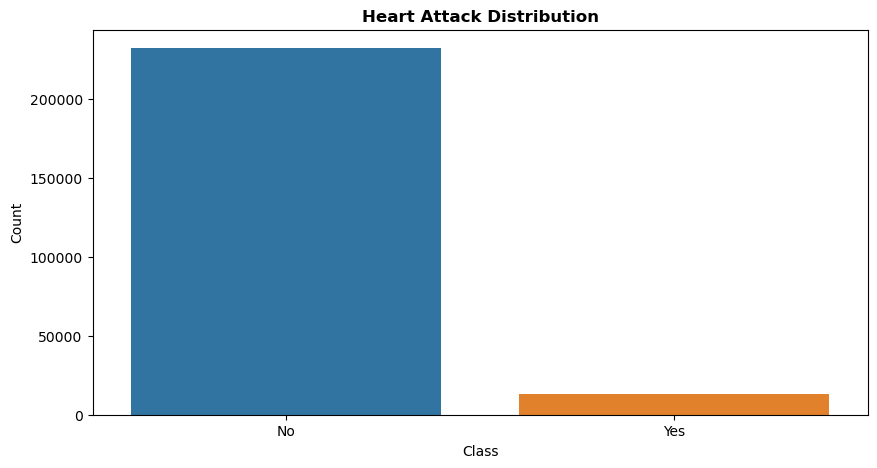

In [15]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='HadHeartAttack', data=df)
plt.title('Heart Attack Distribution', fontweight='bold')
plt.xlabel('Class')
plt.ylabel('Count')

From the distribution we can clearly see that we have the data-imbalance issue in our dataset. During our split we need to handle this case so we don't end up to train our model bias towards majority class.

In [17]:
patient_health = df.drop('HadHeartAttack', axis=1)
heart_attack_status = pre_processing_functions.yes_no_transformer(df['HadHeartAttack'])

# Spliting our data into Test and Train sets to prevent data leckage
# Here stratify will make sure we have equal number of samples of the minority class
patient_health_train, patient_health_test, heart_attack_status_train, heart_attack_status_test = train_test_split(
    patient_health, heart_attack_status,
    test_size=0.2,
    stratify=heart_attack_status,
    random_state=42
)

Let's verify if the skLearn has done it's job right or not

In [19]:
# Verify class distribution
print("Original class distribution:")
print(heart_attack_status.value_counts(normalize=True))

print("\nTrain class distribution:")
print(heart_attack_status_train.value_counts(normalize=True))

print("\nTest class distribution:")
print(heart_attack_status_test.value_counts(normalize=True))

Original class distribution:
HadHeartAttack
0    0.945379
1    0.054621
Name: proportion, dtype: float64

Train class distribution:
HadHeartAttack
0    0.945381
1    0.054619
Name: proportion, dtype: float64

Test class distribution:
HadHeartAttack
0    0.945371
1    0.054629
Name: proportion, dtype: float64


As we can see the test and train data both has the equal percentage of positive and negative distribution for HadHeartAttack feature.

### Hypothesis Testing

#### Physical Activity vs HadHeartAttact
   
Let's find out if there is any relationship between Physical Activity and HadHeartAttack based on our data. In general, people often say that if you are more physically active, you are less prone to having a heart attack.

<b>Null Hypothesis (H0):</b> There is no relationship between physical activities and having had a heart attack.

<b>Alternative Hypothesis (H1):</b> People who engage in physical activities are less likely to have had a heart attack.

In [23]:
# Create the consitancy table for Physical Activity and HadHeartAttack
activity_consistancy_table = pd.crosstab(patient_health_train['PhysicalActivities'], heart_attack_status_train)

# Chi-square test
chi2, p, dof, expected = chi2_contingency(activity_consistancy_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies: \n{expected}")

# Interpretation of the p-value
if p < 0.05:
    print("Reject the null hypothesis: Physical activities and heart attack are dependent.")
else:
    print("Fail to reject the null hypothesis: Physical activities and heart attack are independent.")


Chi-Square Statistic: 1365.6147051953574
P-value: 6.230072374342175e-299
Degrees of Freedom: 1
Expected Frequencies: 
[[ 41293.30575944   2385.69424056]
 [144567.69424056   8352.30575944]]
Reject the null hypothesis: Physical activities and heart attack are dependent.


From the chi-square results we can say that the people who are more physically active they are more prone to the heart attack.

#### BMI vs HadHeartAttact

As we know BMI is the important factor to cause the Heart Attack. Let's verify if it is true with our dataset or not.

<b>Null Hypothesis (H0):</b> BMI does not have a significant relationship with heart disease conditions.

<b>Alternative Hypothesis (H1):</b> Higher BMI is associated with an increased likelihood of heart disease.

In [27]:
# Split data into two groups: those who had a heart attack and those who didn't
heart_attack = patient_health_train[heart_attack_status_train == 'Yes']['BMI']
no_heart_attack = patient_health_train[heart_attack_status_train == 'No']['BMI']

# Perform t-test
t_stat, p_value = ttest_ind(heart_attack, no_heart_attack, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation of the p-value
if p_value < 0.05:
    print("Significant difference in BMI between people who had and hadn't had a heart attack.")
else:
    print("No significant difference in BMI between the groups.")

T-statistic: nan
P-value: nan
No significant difference in BMI between the groups.


As we can see above that the BMI is not playing the significant role to make our decision that if the person will probabaly have heart attack or not.

#### SleepHour vs HadHeartAttact

In my opinoion the sleep hour and the HadHeartAttack column will be not related. We will explore more about it in our co-relation matrix but first let's run the quick test to find out our assumption.

<b>Null Hypothesis (H0):</b> SleepHours does not have a significant relationship with heart disease conditions.

<b>Alternative Hypothesis (H1):</b> More SleepHours are associated with an increased likelihood of heart disease.


In [31]:
# Split data into two groups: those who had a heart attack and those who didn't
heart_attack = patient_health_train[heart_attack_status_train == 'Yes']['SleepHours']
no_heart_attack = patient_health_train[heart_attack_status_train == 'No']['SleepHours']

# Perform t-test
t_stat, p_value = ttest_ind(heart_attack, no_heart_attack, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation of the p-value
if p_value < 0.05:
    print("Significant difference in SleepHours between groups (had vs. not had heart attack).")
else:
    print("No significant difference in SleepHours between the two groups.")

T-statistic: nan
P-value: nan
No significant difference in SleepHours between the two groups.


Tada our assumption is true that sleephours doesn't contribute to the heart disease condition.

### Data PreProcessing

For our first step we will encode our categorical variable using Onehot and Ordinal encoder. 

Let's look into our first column state.

In [35]:
heart_attack_data_dictionary[heart_attack_data_dictionary['Column Name'] == 'State']

,Column Name,Data Type,Description,Unique Values,Missing Values,Distinct Values,Value Range
0,State,object,State FIPS Code,54,0,"[Alabama, Alaska, Arizona, Arkansas, California, Colorado, Connecticut, Delaware, District of Columbia, Florida, Georgia, Hawaii, Idaho, Illinois, Indiana, Iowa, Kansas, Kentucky, Louisiana, Maine, Maryland, Massachusetts, Michigan, Minnesota, Mississippi, Missouri, Montana, Nebraska, Nevada, New Hampshire, New Jersey, New Mexico, New York, North Carolina, North Dakota, Ohio, Oklahoma, Oregon, Pennsylvania, Rhode Island, South Carolina, South Dakota, Tennessee, Texas, Utah, Vermont, Virginia, Washington, West Virginia, Wisconsin, Wyoming, Guam, Puerto Rico, Virgin Islands]",N/A


As we can see we have many state values which don't have the linear relationship between them. So Onehot encoding will be the perfect choice for this feature.

In [37]:
heart_attack_data_dictionary[heart_attack_data_dictionary['Column Name'] == 'Sex']

,Column Name,Data Type,Description,Unique Values,Missing Values,Distinct Values,Value Range
1,Sex,object,Sex of Respondent,2,0,"[Female, Male]",N/A


For our Sex feature has two values Male and Female.At a first look we can hink that they are the ordinnal categories but we can't find any linear relationship between them. So it will be a good idea to encode them using the onehot encoder.

In [39]:
heart_attack_data_dictionary[heart_attack_data_dictionary['Column Name'] == 'GeneralHealth']

,Column Name,Data Type,Description,Unique Values,Missing Values,Distinct Values,Value Range
2,GeneralHealth,object,Would you say that in general your health is:,5,0,"[Very good, Fair, Good, Excellent, Poor]",N/A


In [40]:
heart_attack_data_dictionary[heart_attack_data_dictionary['Column Name'] == 'AgeCategory']

,Column Name,Data Type,Description,Unique Values,Missing Values,Distinct Values,Value Range
15,AgeCategory,object,Fourteen-level age category,13,0,"[65-69, 70-74, 75-79, 80+, 50-54, 40-44, 60-64, 55-59, 45-49, 35-39, 25-29, 30-34, 18-24]",N/A


GeneralHealth has five categories and we can clearly see that all of the categories has the linear relationship between them. So the ordinal encoder will be the beeter choice and the same thing will goes for the AgeCategory feature.

Let's apply the encoder on all of the features. We will use the pipeline to easily encode all the features in one step. ColumnTransformer will be helpful to define individual encoding types for each columns.

In [42]:
# Columns by type
onehot_cols = ['State', 'Sex', 'RaceEthnicityCategory', 'SmokerStatus']
ordinal_cols = ['AgeCategory', 'GeneralHealth']
yesno_cols = ['PhysicalActivities', 'HadAngina', 'HadStroke', 'HadCOPD', 'HadKidneyDisease',
             'HadArthritis', 'HadDiabetes', 'ChestScan', 'AlcoholDrinkers']
numeric_cols = ['SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI']

# Custom order for AgeCategory
age_order = [['18-24', '25-29', '30-34', '35-39', '40-44',
             '45-49', '50-54', '55-59', '60-64', '65-69',
             '70-74', '75-79', '80+']]

# Create the pre_processor using the column transformer
pre_processor = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'), onehot_cols),
    ('ordinal_age', OrdinalEncoder(categories=age_order), ['AgeCategory']),
    ('ordinal', OrdinalEncoder(),['GeneralHealth']),
    ('yesno', FunctionTransformer(pre_processing_functions.yes_no_transformer),yesno_cols),
    ('numeric',StandardScaler(),numeric_cols)
])

Our Preprocessor is ready now let me answer the question why we use the StandardScaler on numerical columns. Let's look into the numerical column values like height and weight. 

In [44]:
heart_attack_data_dictionary[heart_attack_data_dictionary['Column Name'] == 'WeightInKilograms']

,Column Name,Data Type,Description,Unique Values,Missing Values,Distinct Values,Value Range
17,WeightInKilograms,float64,Reported weight in kilograms,457,0,"[71.67, 95.25, 108.86, 90.72, 79.38, 120.2, 88.0, 74.84, 78.02, 63.5, 122.47, 115.67, 81.65, 86.18, 76.2, 54.88, 72.57, 88.45, 104.33, 52.16, 68.04, 65.77, 56.7, 94.8, 123.83, 50.8, 68.95, 113.4, 83.91, 77.56, 68.49, 82.1, 80.74, 106.14, 58.06, 61.69, 57.61, 84.82, 70.76, 70.31, 91.63, 102.06, 48.08, 61.23, 109.77, 99.79, 58.97, 110.68, 64.86, 111.13, 45.36, 79.83, 98.88, 55.34, 101.6, 77.11, 93.89, 71.21, 49.9, 96.16, 163.29, 120.66, 97.52, 88.9, 44.91, 85.73, 83.46, 92.99, 132.0, 67.59, 92.08, 73.48, 107.5, 107.95, 91.17, 74.39, 64.41, 62.6, 46.72, 103.42, 87.09, 89.81, 83.01, 100.7, 56.25, 96.62, 66.68, 67.13, 69.4, 58.51, 78.93, 95.71, 63.05, 49.44, 127.01, 145.15, 122.02, 107.05, 126.55, 117.03, ...]","(30.39, 200.0)"


In [45]:
heart_attack_data_dictionary[heart_attack_data_dictionary['Column Name'] == 'HeightInMeters']

,Column Name,Data Type,Description,Unique Values,Missing Values,Distinct Values,Value Range
16,HeightInMeters,float64,Reported height in meters,72,0,"[1.6, 1.78, 1.85, 1.7, 1.55, 1.63, 1.75, 1.68, 1.83, 1.52, 1.88, 1.5, 1.73, 1.65, 1.8, 1.57, 1.91, 1.47, 1.42, 1.22, 1.93, 2.01, 1.96, 1.98, 1.45, 1.35, 1.76, 2.03, 1.51, 1.53, 1.69, 1.56, 1.84, 1.9, 1.54, 1.72, 1.87, 1.74, 1.4, 1.64, 1.58, 1.62, 1.79, 1.67, 1.46, 1.89, 1.61, 1.3, 1.37, 2.06, 1.77, 1.59, 1.86, 1.82, 1.66, 1.71, 1.95, 2.08, 1.49, 1.38, 1.81, 1.44, 1.48, 1.32, 1.24, 1.27, 1.92, 1.2, 1.25, 1.43, 2.0, 2.02]","(1.2, 2.08)"


As we can see the Weight's value range is beterrn 30 to 200 and on the other side the height values are lie between 1 to 2. If we will not convert those data to same scale then our model will probabaly bias towards the weight values and may give us the wrong predictions.

So it will be the good idea to include the scaling the numeric values to our pipeline.

In [47]:
# Fit on training data
patient_health_train_encoded = pre_processor.fit_transform(patient_health_train)
patient_health_test_encoded = pre_processor.transform(patient_health_test)

full_column_list_encoded = (
    pre_processor.named_transformers_['onehot'].get_feature_names_out(onehot_cols).tolist()
    + ordinal_cols
    + yesno_cols
    + numeric_cols
) 

patient_health_train_encoded = pd.DataFrame(patient_health_train_encoded.toarray(), columns=full_column_list_encoded,index=patient_health_train.index)
patient_health_test_encoded = pd.DataFrame(patient_health_test_encoded.toarray(), columns=full_column_list_encoded,index=patient_health_test.index)

We specifically don't need the encoded dataframe while we are working with the pipeline. But As we need to find out the corelation between some of our columns then it will be a good idea to convert the sparse matrix to dataframe so we can plot our co-relation matrix.

In [49]:
patient_health_train_encoded['target'] = heart_attack_status_train.values
display(patient_health_train_encoded.corr()['target'].sort_values(ascending=False))

target                               1.000000
HadAngina                            0.445720
HadStroke                            0.173019
AgeCategory                          0.172731
ChestScan                            0.168083
HadDiabetes                          0.140238
HadCOPD                              0.133774
HadArthritis                         0.117910
HadKidneyDisease                     0.109125
SmokerStatus_Former smoker           0.075791
Sex_Male                             0.073441
WeightInKilograms                    0.038871
SmokerStatus_Current Smoker          0.038072
BMI                                  0.030813
RaceEthnicityCategory_White          0.023653
HeightInMeters                       0.023171
State_Florida                        0.016743
State_West Virginia                  0.013786
State_Arkansas                       0.013033
State_Maine                          0.012550
State_Ohio                           0.010728
State_Arizona                     

As we can see from our pearson's corelation Agina, Stroke, Chest issues, COPD, Disease, smoking and weight are the main factors which are contributing to the heart attack condition.  

As we know that pearson's corelation is Linear. Let's try to findout the covariance between them using the spearman's corelation.

In [73]:
display(patient_health_train_encoded.corr('spearman')['target'].sort_values(ascending=False))

target                               1.000000
HadAngina                            0.445720
AgeCategory                          0.177174
HadStroke                            0.173019
ChestScan                            0.168083
HadDiabetes                          0.140238
HadCOPD                              0.133774
HadArthritis                         0.117910
HadKidneyDisease                     0.109125
SmokerStatus_Former smoker           0.075791
Sex_Male                             0.073441
WeightInKilograms                    0.043268
SmokerStatus_Current Smoker          0.038072
BMI                                  0.036946
HeightInMeters                       0.027770
RaceEthnicityCategory_White          0.023653
State_Florida                        0.016743
State_West Virginia                  0.013786
State_Arkansas                       0.013033
State_Maine                          0.012550
State_Ohio                           0.010728
State_Arizona                     

We can't spot any difference from pearson's corelation. But double checkig everything is always better.